# 3. Perform KNN with the library and plot the results. Print the Accuracy score, classification report and plot the confusion matrix. Use Diabetes and wine dataset for this.

# diabetes dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns



In [10]:
dia = load_wine()
X, y = dia.data, dia.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
predictions = knn.predict(X_test)

In [15]:
print(confusion_matrix(y_test, predictions))

[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


<Axes: >

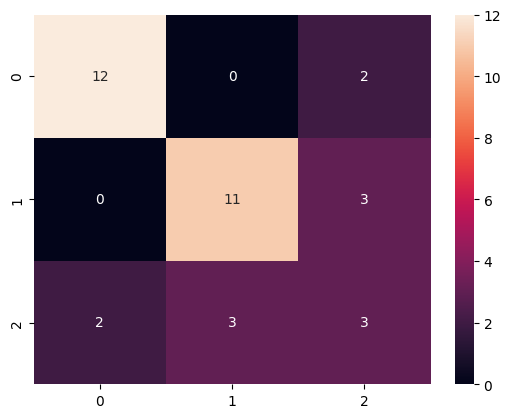

In [16]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



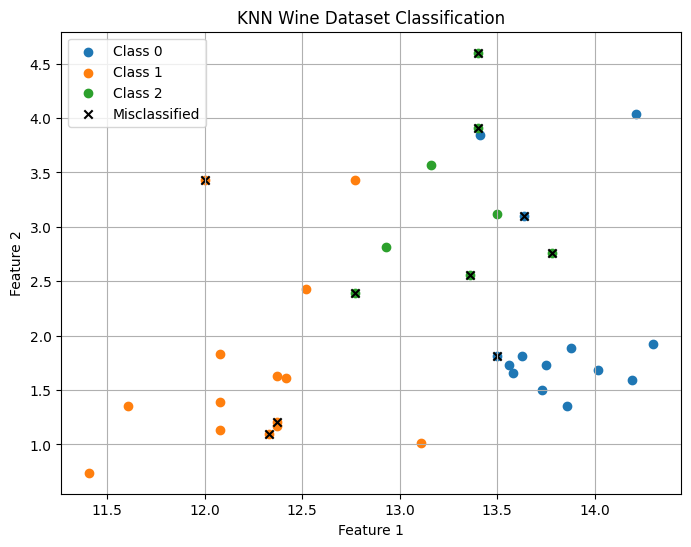

In [18]:
plt.figure(figsize=(8, 6))

# Plot points from each class
for label in np.unique(y_test):
    X_label = X_test[y_test == label]
    plt.scatter(X_label[:, 0], X_label[:, 1], label=f'Class {label}')

# Highlight misclassified points
misclassified = X_test[y_test != predictions]
plt.scatter(misclassified[:, 0], misclassified[:, 1], marker='x', color='black', label='Misclassified')

plt.title('KNN Wine Dataset Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# diabetes dataset

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [2]:
dia = load_diabetes()
X, y = dia.data, dia.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [7]:
predictions = knn.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 3019.075505617978
Mean Absolute Error: 42.77078651685394


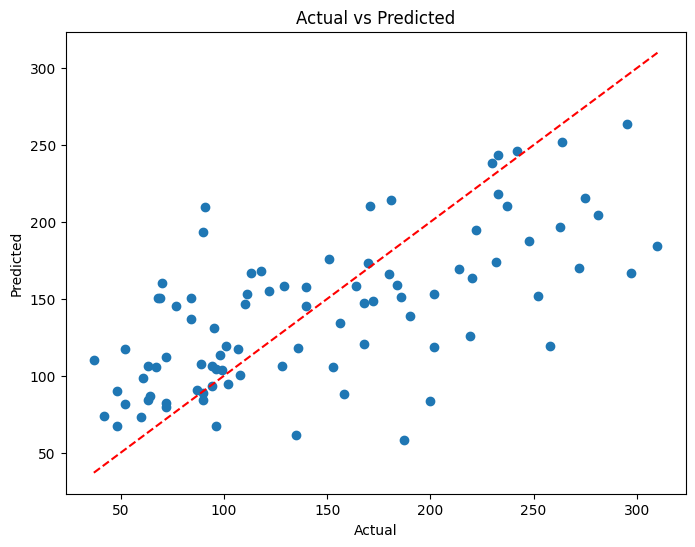

In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plotting the diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
